## Install YOLOv8 and initialize the model

In [ ]:
!nvidia-smi
!pip install ultralytics==8.0.134
!pip install roboflow

Wed Aug  2 10:35:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from typing import List, Dict
import os, json
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
from roboflow import Roboflow, Project
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.5/78.2 GB disk)


In [ ]:
CURRENT_DIRECTORY : str = os.getcwd()
DATASET_PATH : str = os.path.join(CURRENT_DIRECTORY, os.path.join("datasets", "cups"))

In [ ]:
!mkdir datasets
%cd datasets
!mkdir cups
%cd ..
!mkdir credentials
%cd credentials
!touch roboflow_key.json
%cd ..

mkdir: cannot create directory ‘datasets’: File exists
/content/datasets
mkdir: cannot create directory ‘cups’: File exists
/content
mkdir: cannot create directory ‘credentials’: File exists
/content/credentials
/content


In [ ]:
def find_single_matching_path(build_path : str, target_path : str = "credentials") -> str:
    paths : List[str] = os.listdir(build_path)
    filtered_paths : List[str] = [path for path in paths if path == target_path]
    if len(filtered_paths) > 1:
      return "Can't have more than one path available"
    elif len(filtered_paths) == 1:
      return os.path.join(build_path, filtered_paths[0])
    else:
      return "Respective path does not exist"

def read_credentials(path : str) -> Dict[str, str]:
  with open(path, "r") as input_file:
    data : Dict[str, str] = json.load(input_file)
  return data

build_path : str = find_single_matching_path(CURRENT_DIRECTORY)
assert " " not in build_path, build_path.split("/")[-1]
build_path : str = find_single_matching_path(build_path, "roboflow_key.json")
assert " " not in build_path, build_path.split("/")[-1]
yolo_cred : Dict[str, str] = read_credentials(build_path)

In [ ]:
rf : Roboflow = Roboflow(api_key=yolo_cred["api_key"])
project : Project = rf.workspace("kshitij-gera-b7cqa").project("vv-lk7zq")
dataset : object = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to vv-2 in yolov8:: 100%|██████████| 2630/2630 [00:01<00:00, 2486.60it/s]


## Train YOLOv8 Model for Cup Detection

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 pretrained=False label_smoothing=0.05 optimizer='SGD' momentum=0.92 cos_lr=True close_mosaic=1 dropout=0.4 weight_decay=0.01 plots=True

100% 21.5M/21.5M [00:00<00:00, 385MB/s]
New https://pypi.org/project/ultralytics/8.0.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/vv-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=1, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=Fal

In [ ]:
!ls {CURRENT_DIRECTORY}/runs/detect/train/ n

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1425.jpg
confusion_matrix.png				    train_batch1426.jpg
events.out.tfevents.1690972587.8bddfdfc488a.4382.0  train_batch1427.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


/content


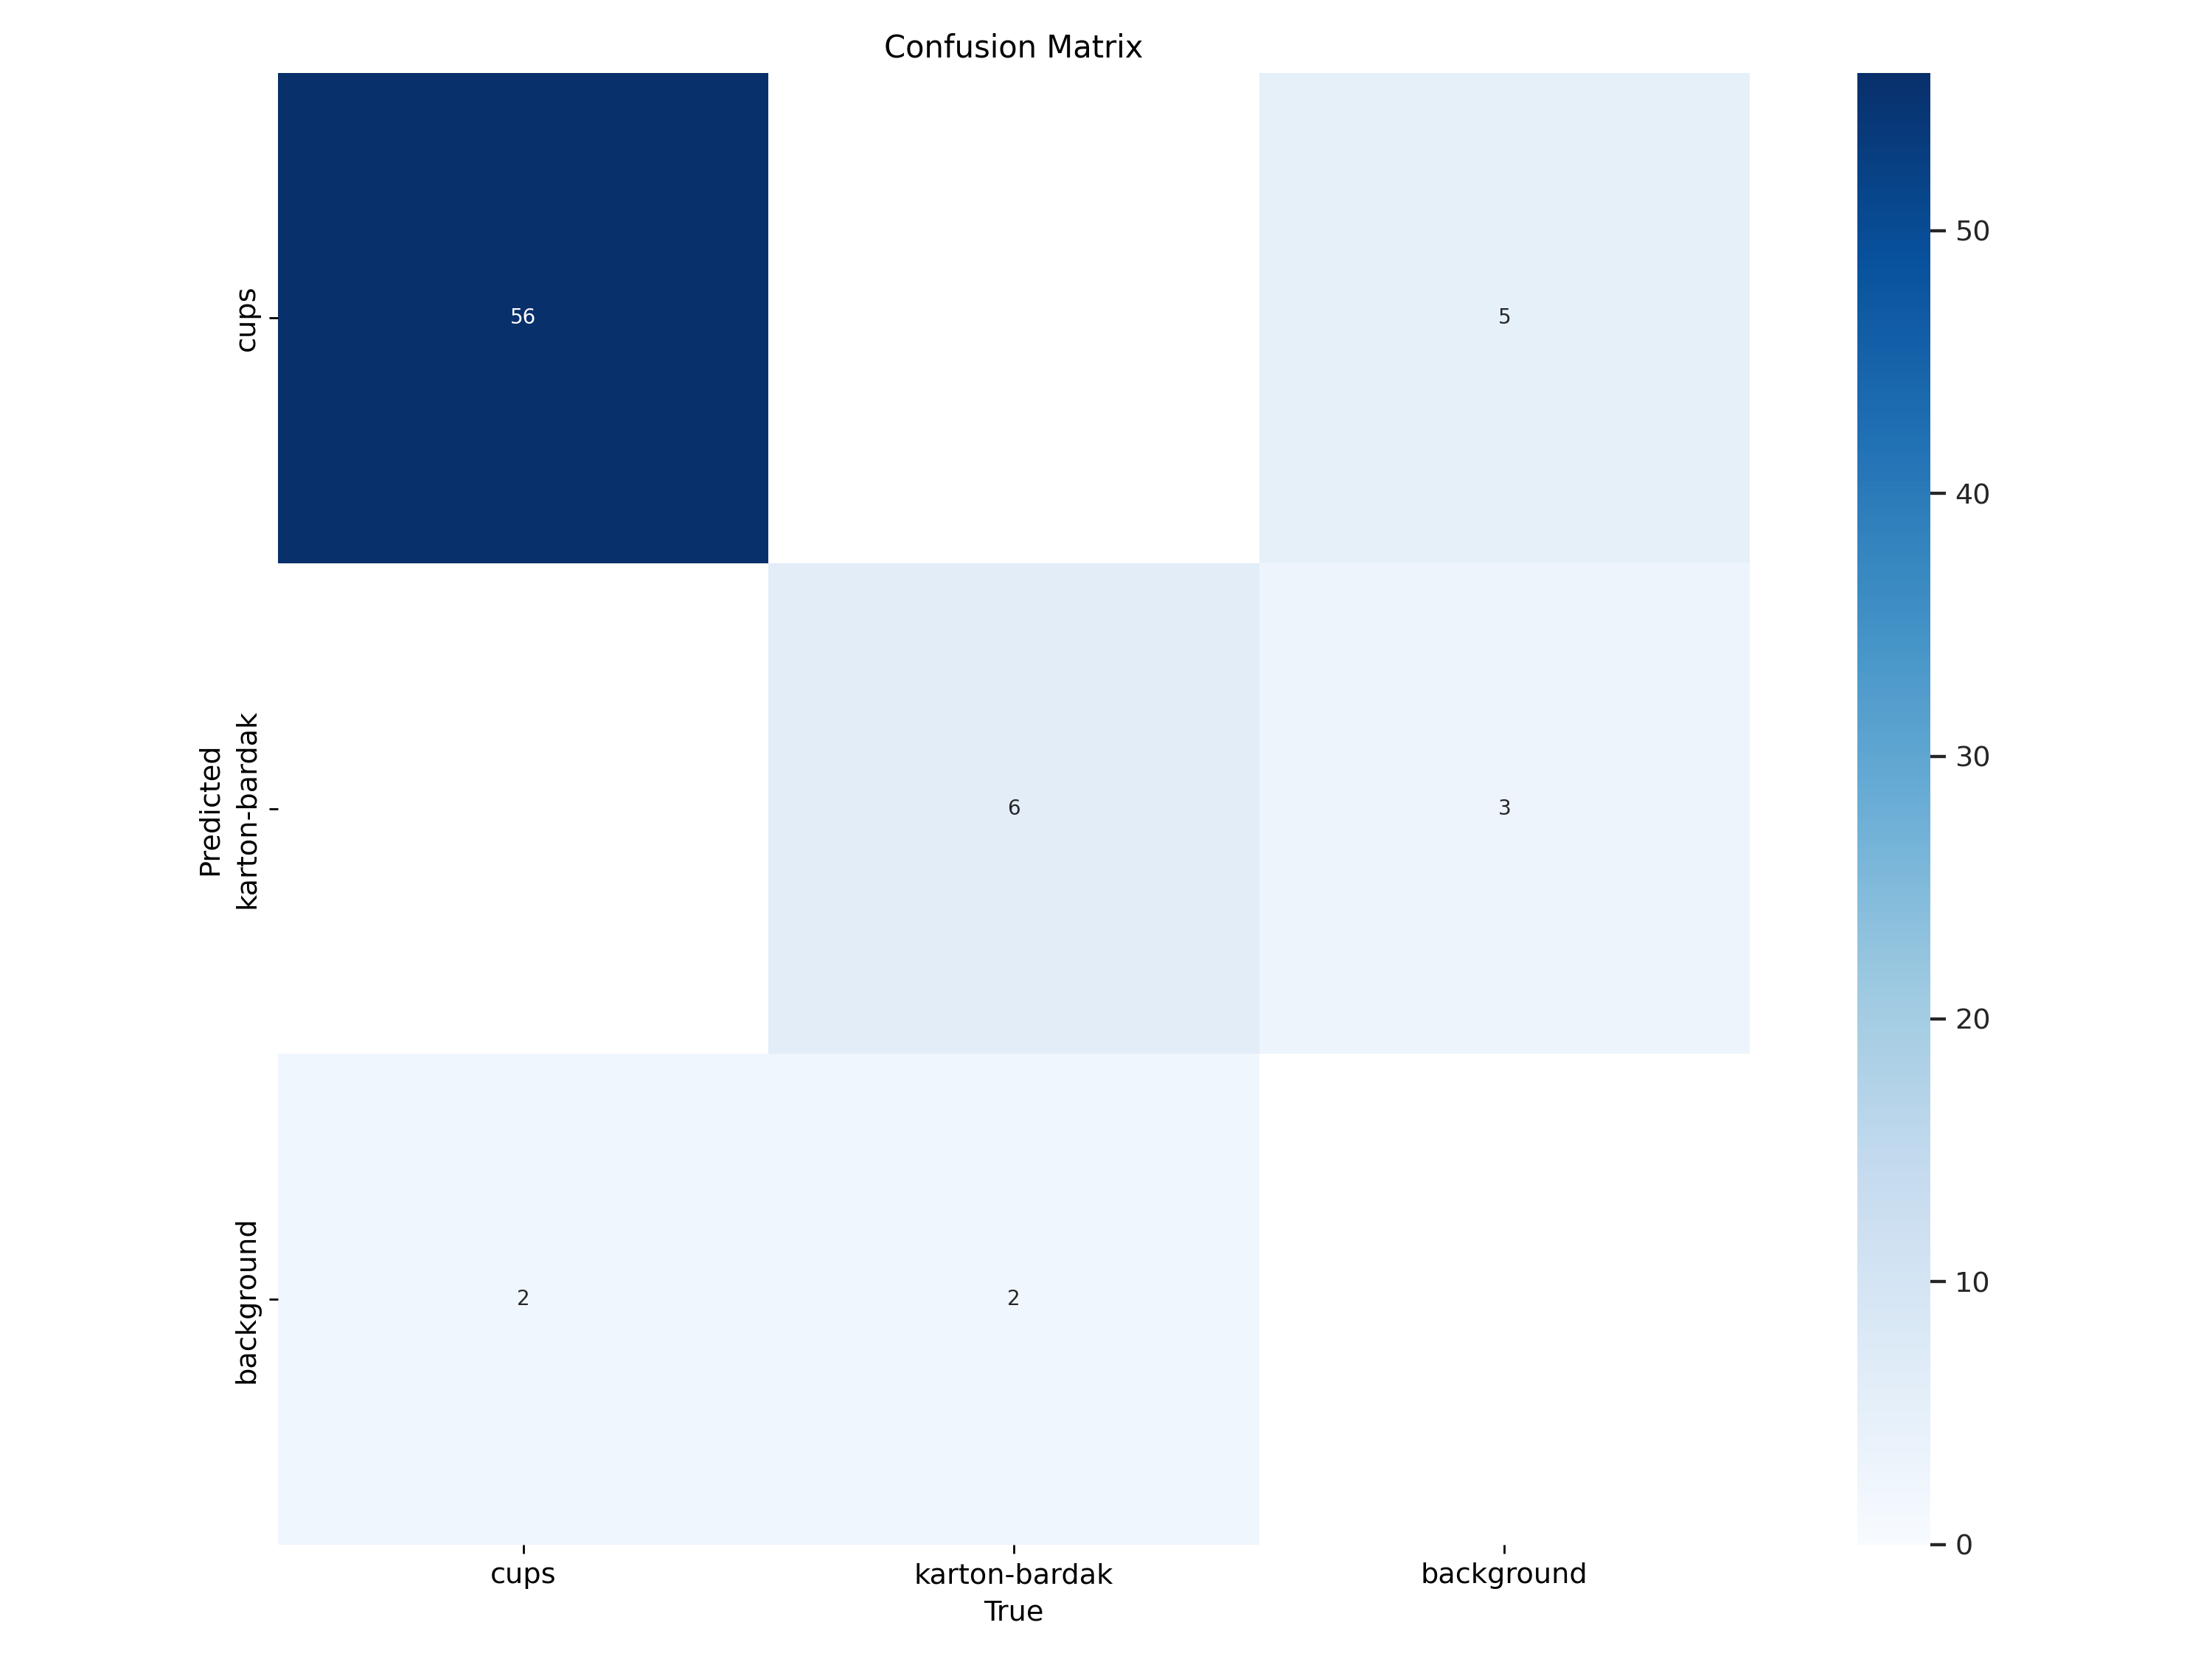

In [ ]:
%cd {CURRENT_DIRECTORY}
Image(filename=f'{CURRENT_DIRECTORY}/runs/detect/train/confusion_matrix.png', width=600)

/content


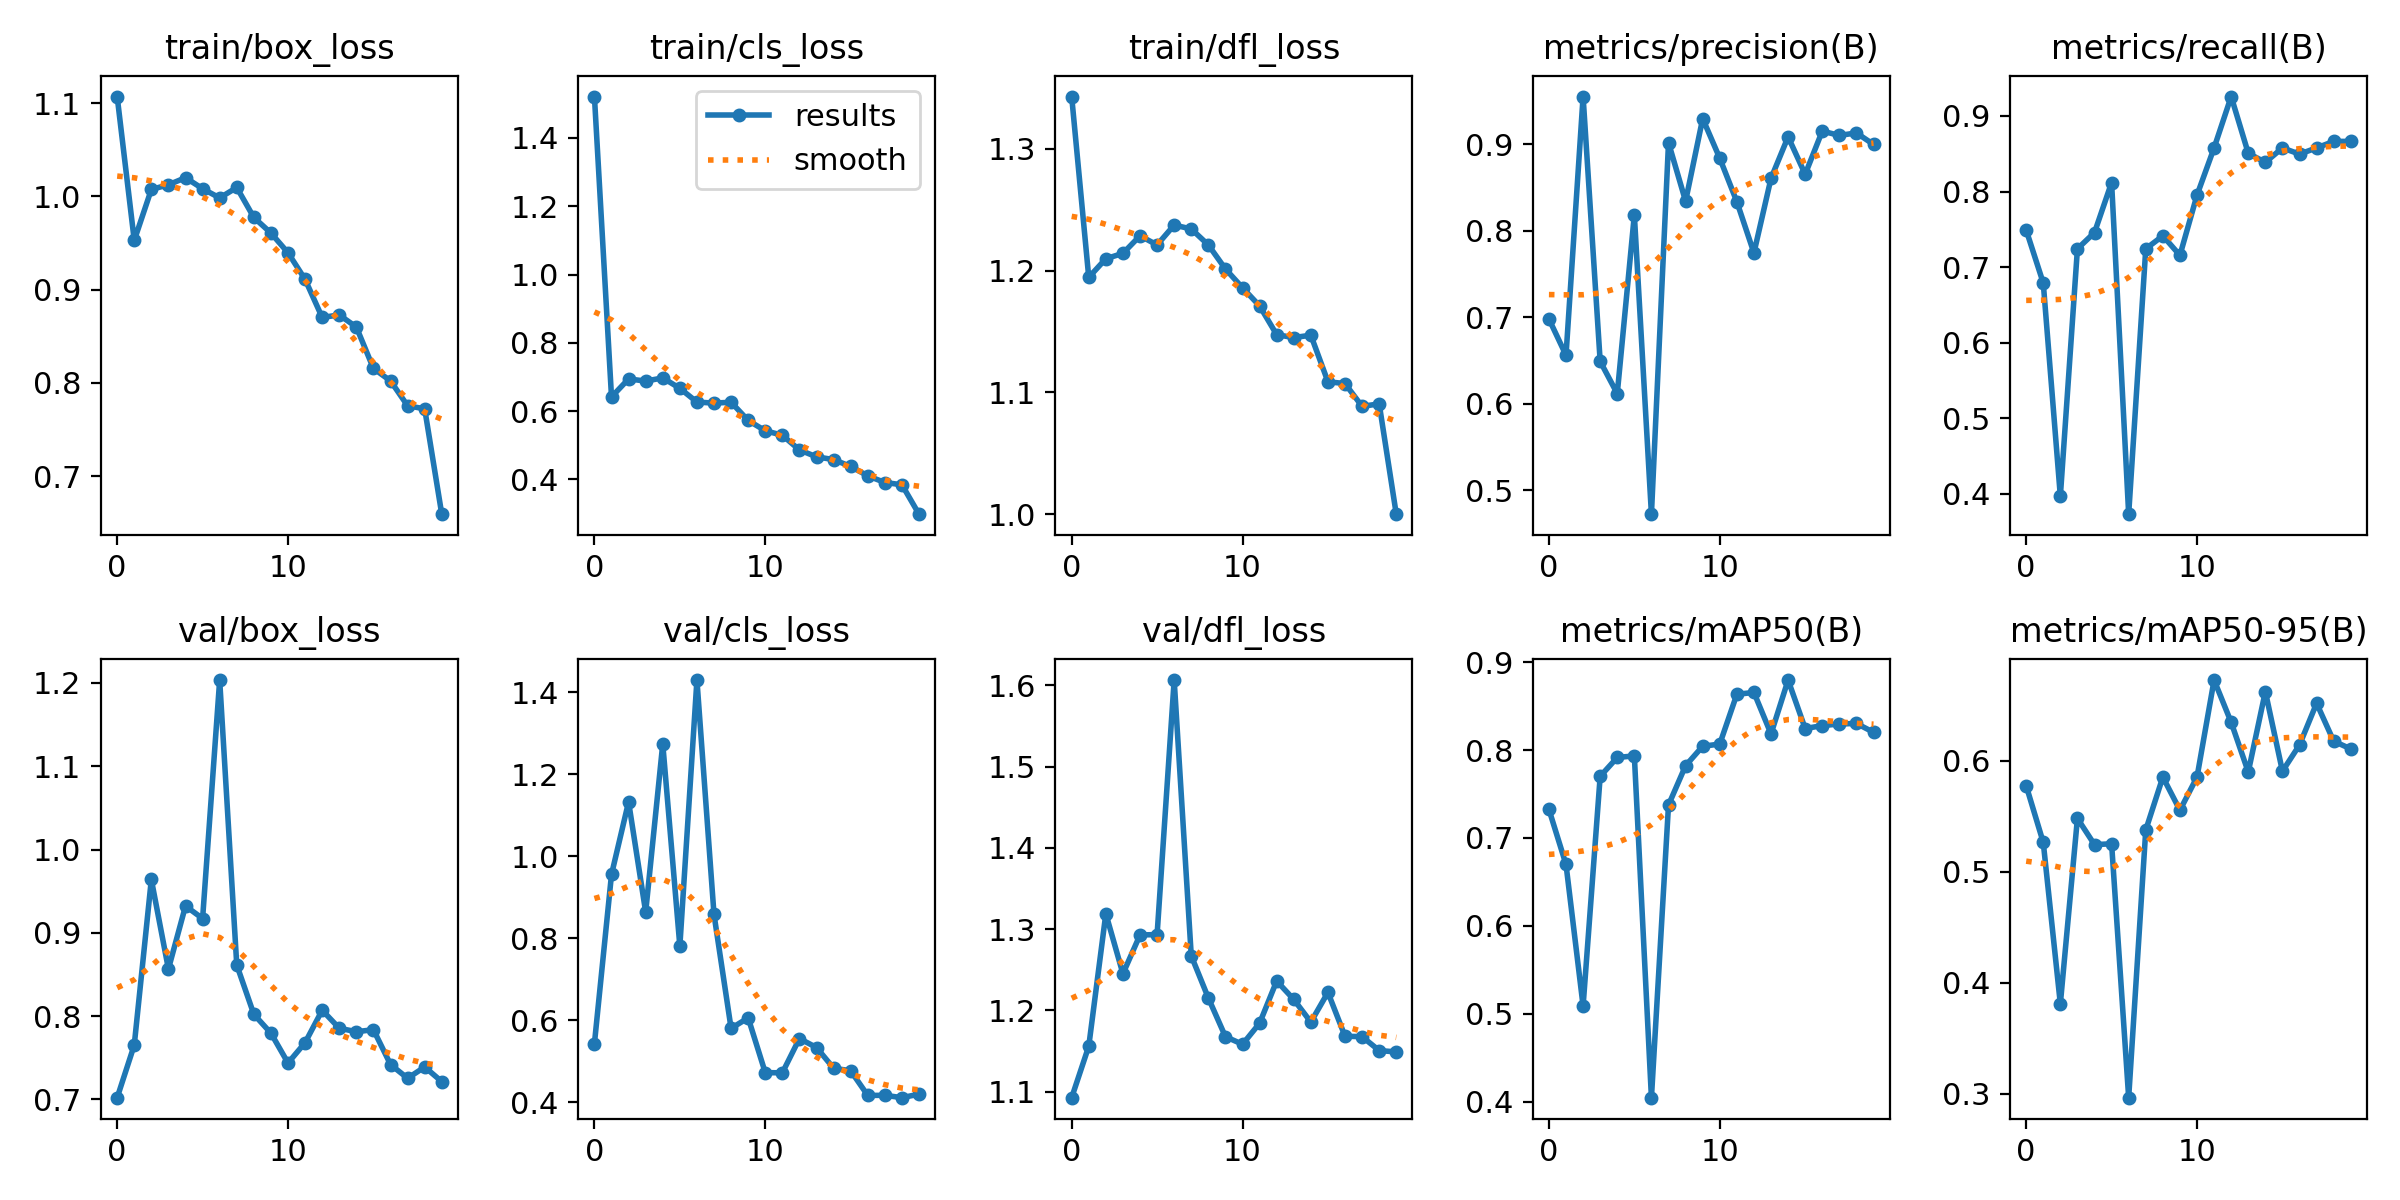

In [ ]:
%cd {CURRENT_DIRECTORY}
Image(filename=f'{CURRENT_DIRECTORY}/runs/detect/train/results.png', width=600)

/content


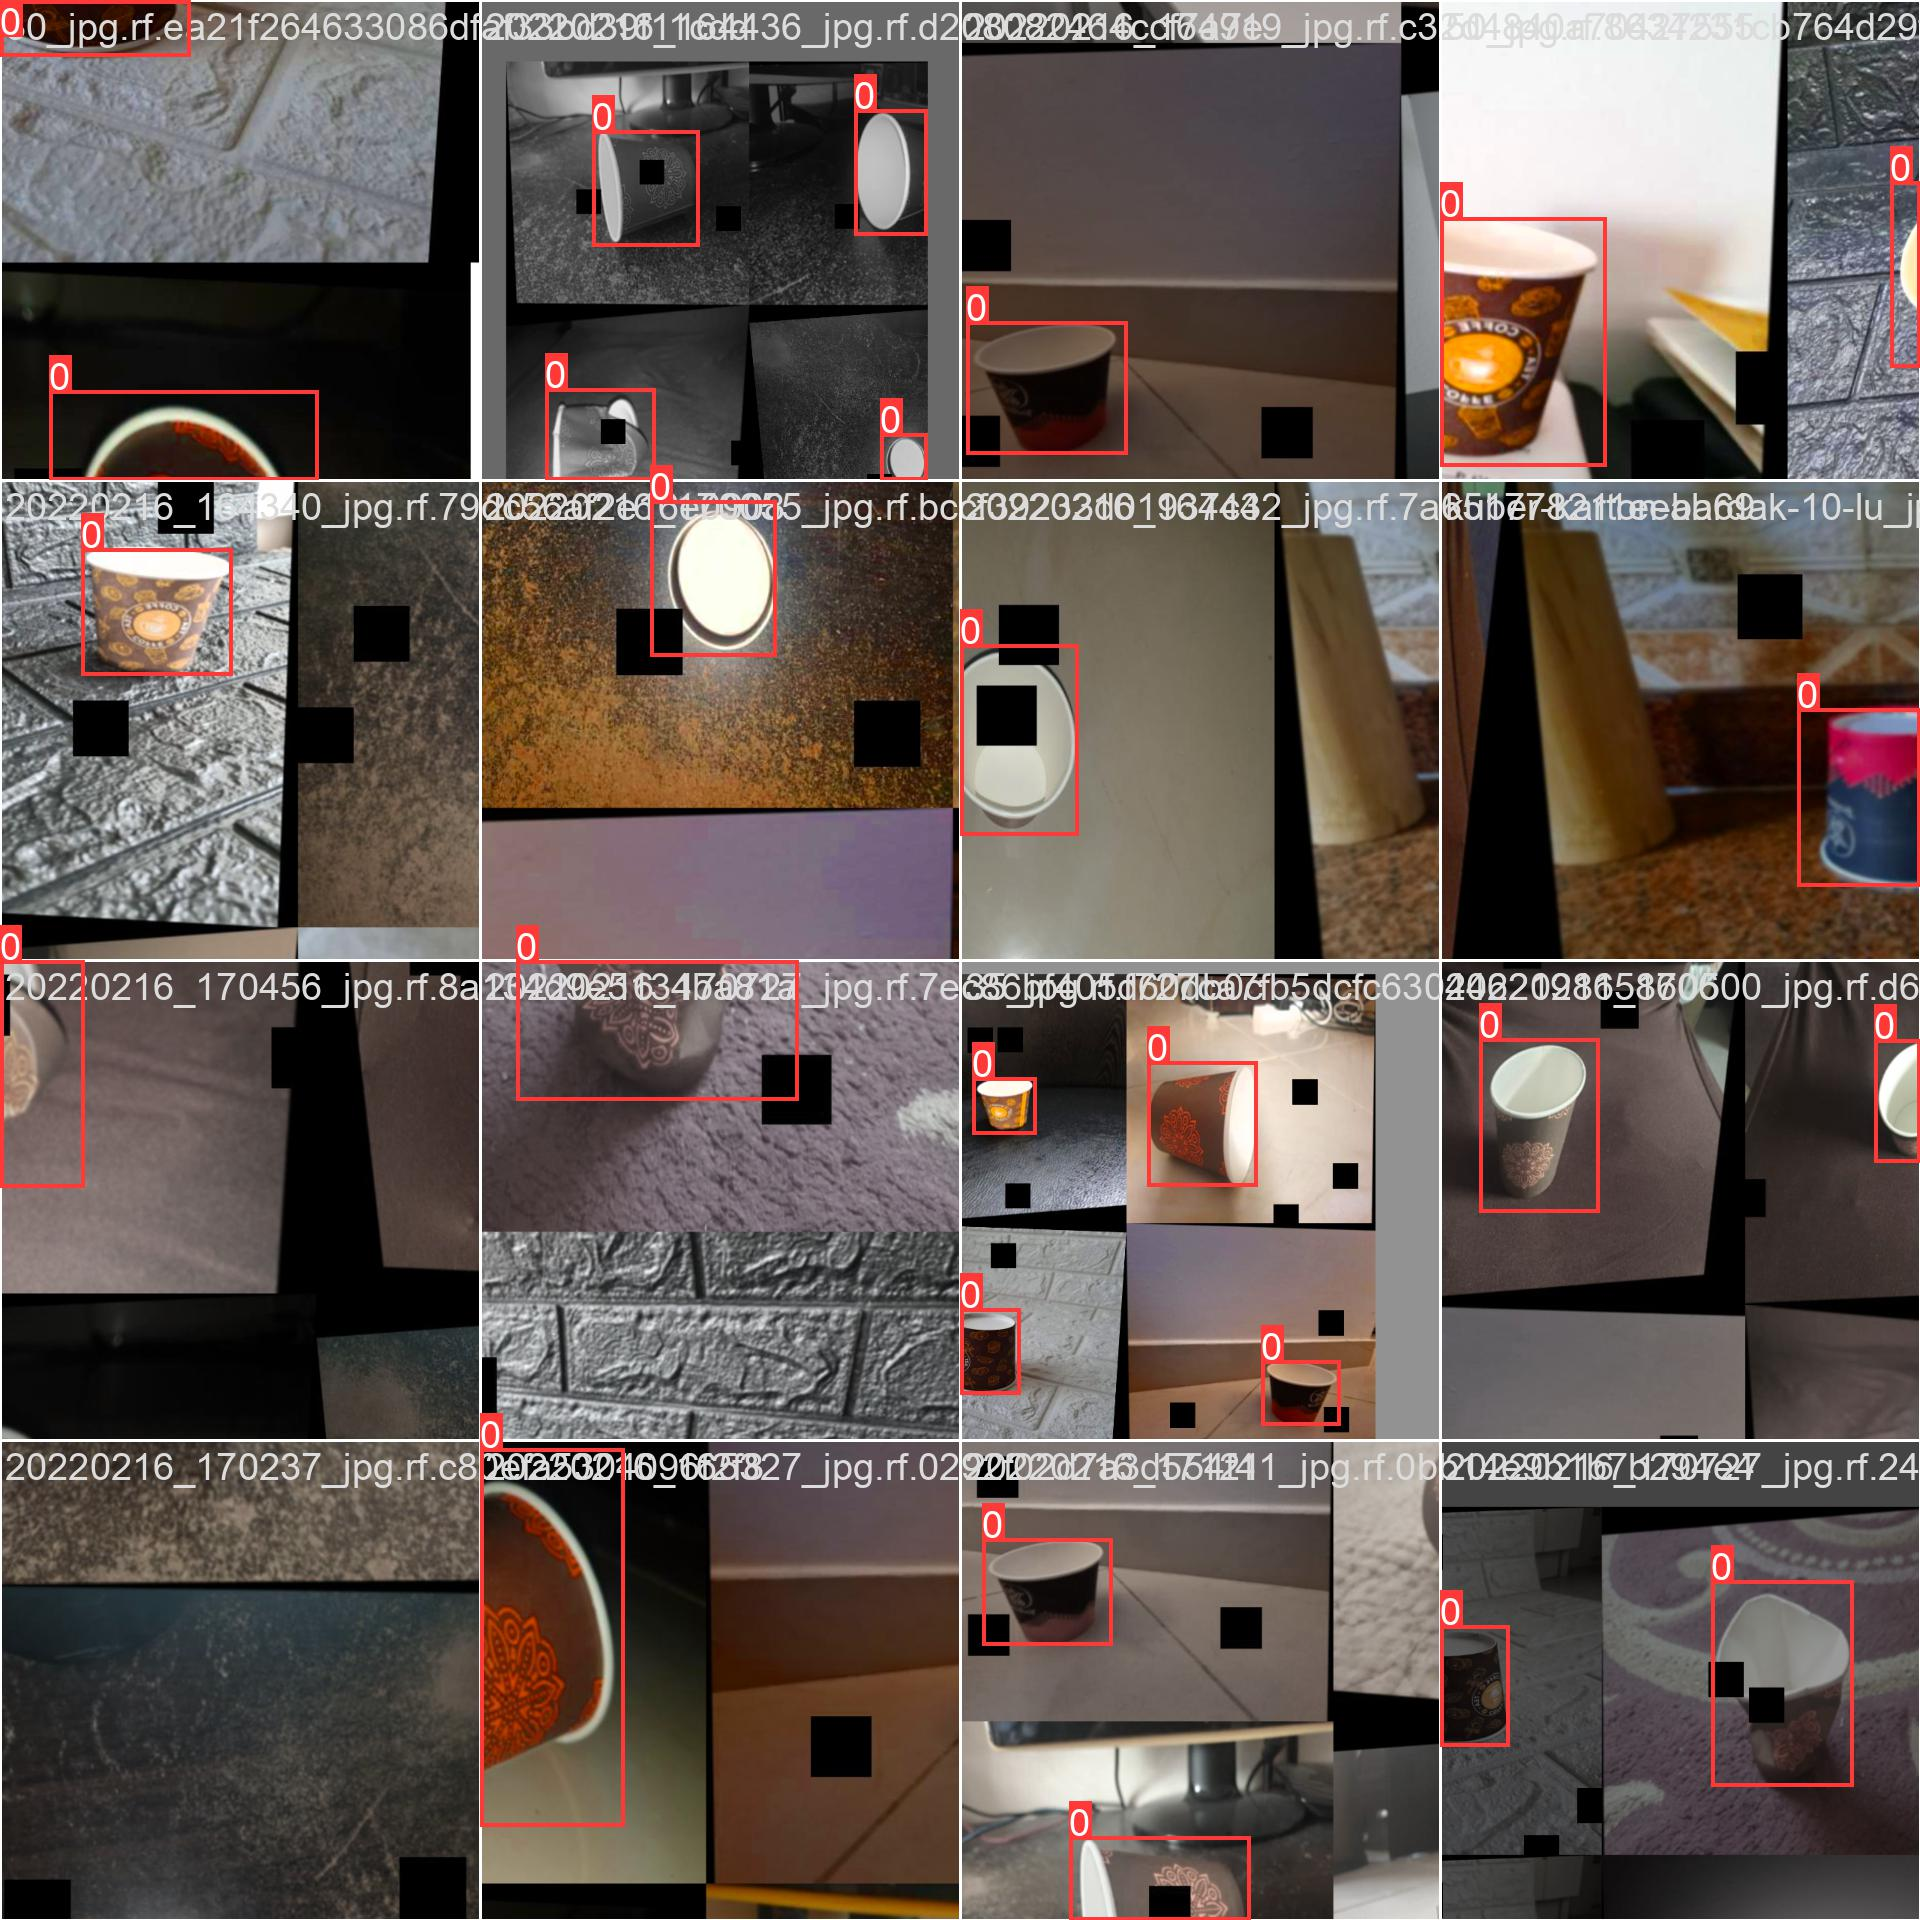

In [ ]:
%cd {CURRENT_DIRECTORY}
Image(filename=f'{CURRENT_DIRECTORY}/runs/detect/train/train_batch2.jpg', width=600)

In [ ]:
%cd {CURRENT_DIRECTORY}
!yolo task=detect mode=predict model={CURRENT_DIRECTORY}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/50 /content/vv-2/test/images/00083_jpg.rf.5387b21f7bf0229dde7a38915a18b289.jpg: 640x640 1 cups, 16.4ms
image 2/50 /content/vv-2/test/images/11_jpg.rf.9b1179cd89be99633dff5ed8bc06331c.jpg: 640x640 1 cups, 17.3ms
image 3/50 /content/vv-2/test/images/12_jpg.rf.9085033c33d7612954f29d9dbecac66e.jpg: 640x640 1 cups, 16.3ms
image 4/50 /content/vv-2/test/images/16_jpg.rf.94d836b810912f842eba7fdbd0ca92a2.jpg: 640x640 2 cupss, 16.3ms
image 5/50 /content/vv-2/test/images/17_jpg.rf.63fcbc2512718373c2f1355fa12dc315.jpg: 640x640 1 cups, 16.3ms
image 6/50 /content/vv-2/test/images/17_jpg.rf.b351d9fccc16d2731987464b56727e22.jpg: 640x640 1 cups, 16.3ms
image 7/50 /content/vv-2/test/images/19_jpg.rf.60b4c4e88874e4307ff529ff06a77a5c.jpg: 640x640 1 cups, 16.1ms
image 8/50 /content/vv-2/test/images/20200826_175901-scaled_jpg.rf.3b0166d

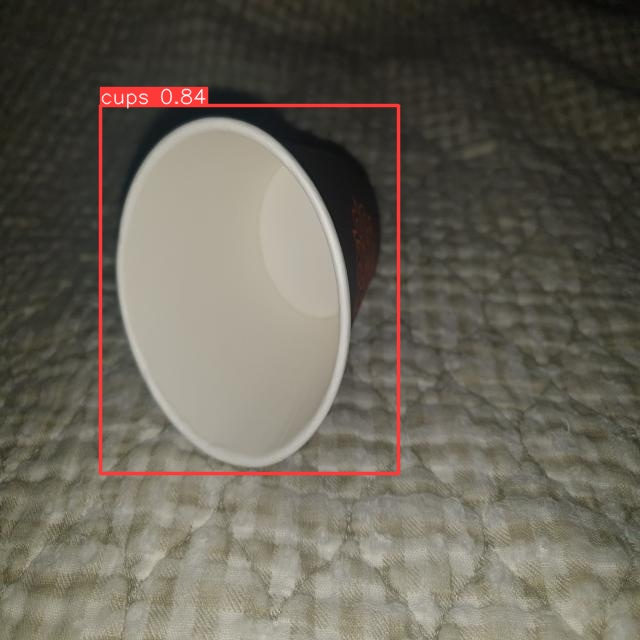

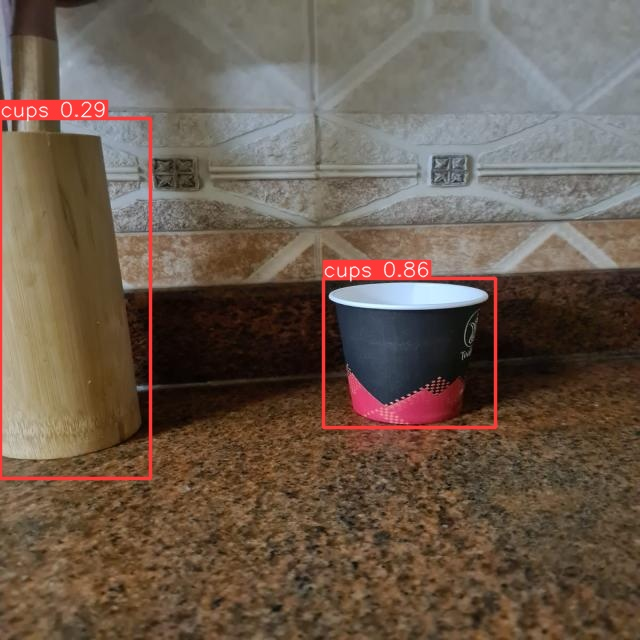

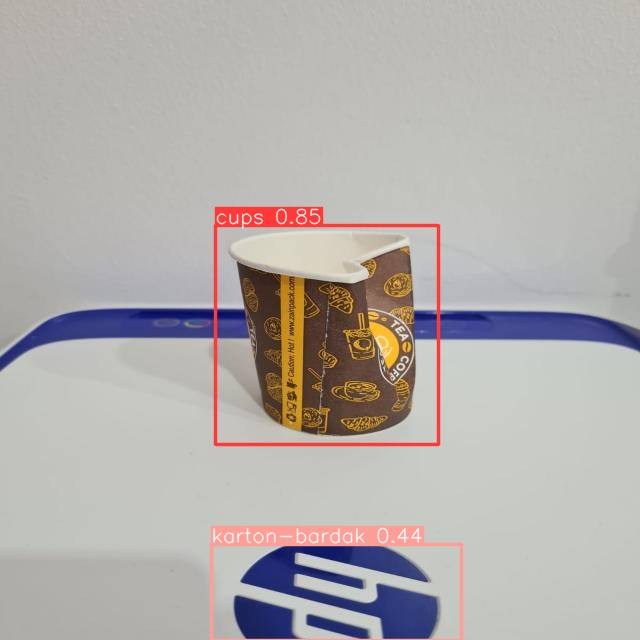

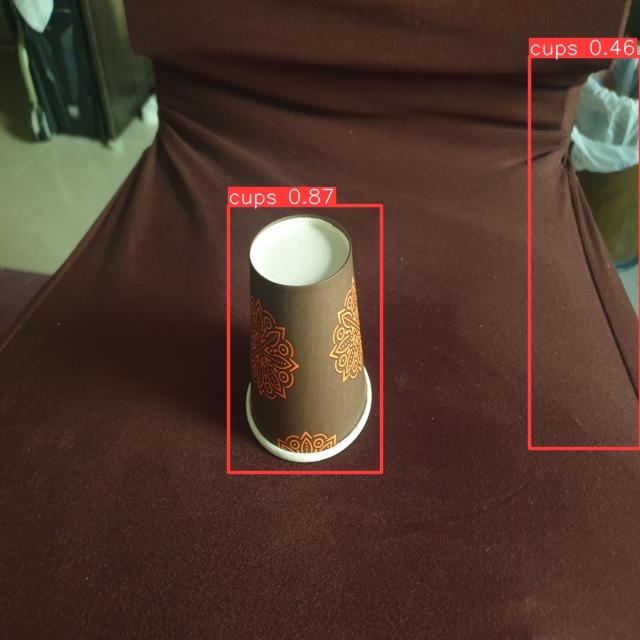

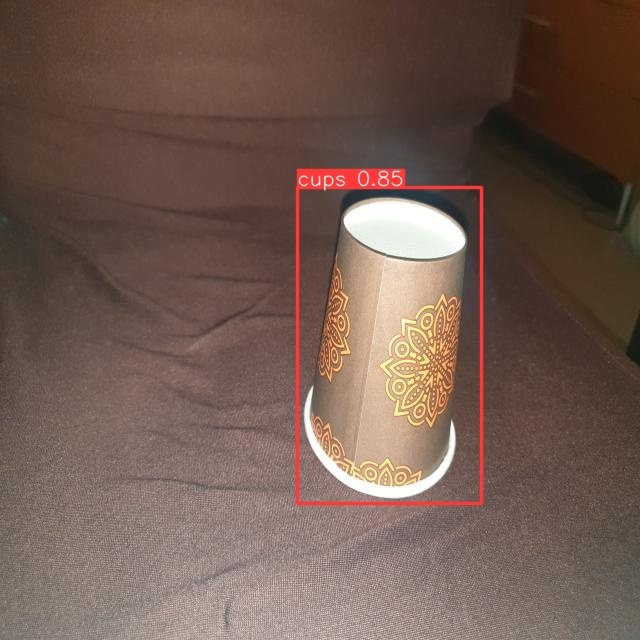

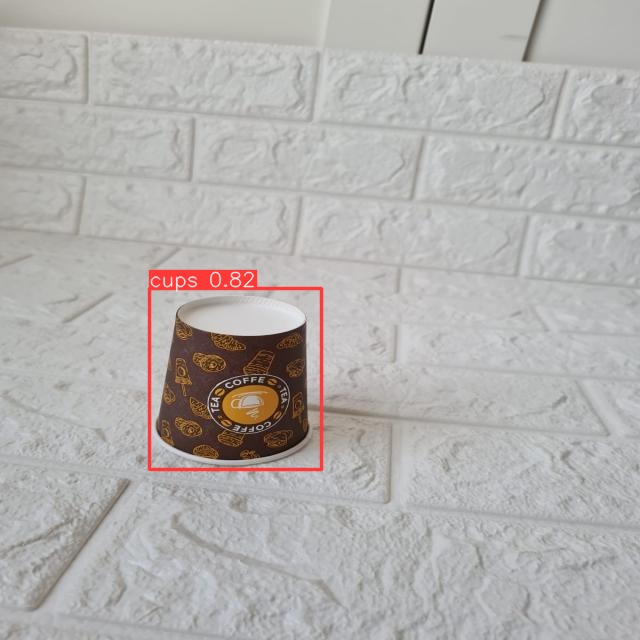

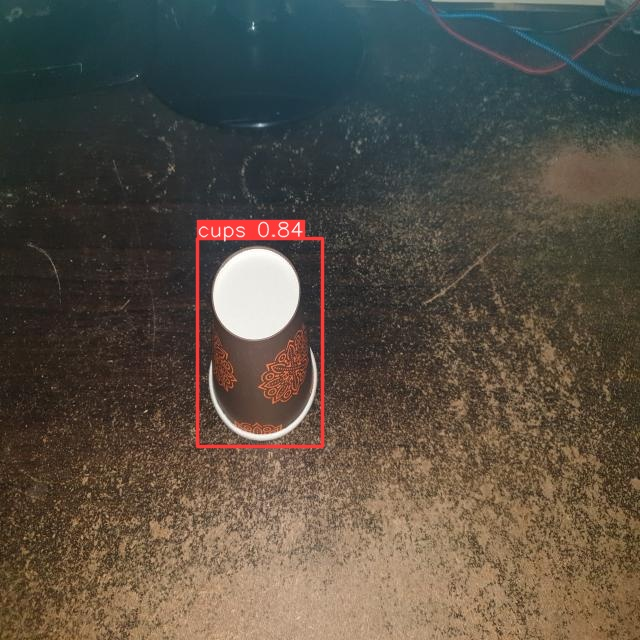

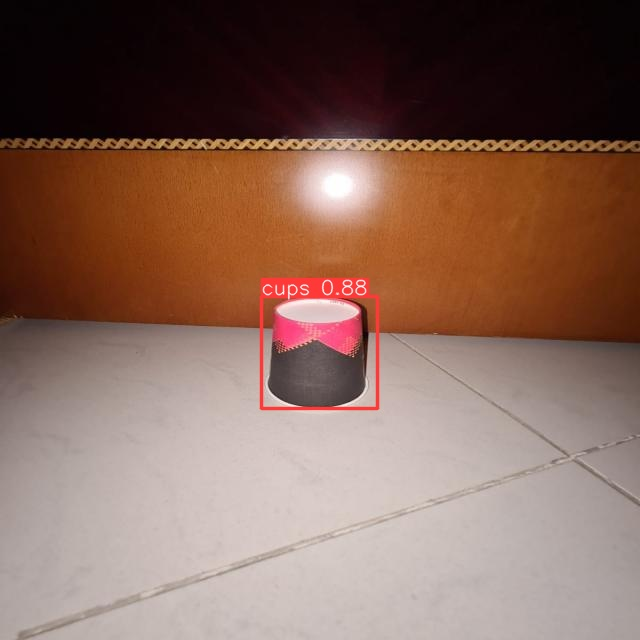

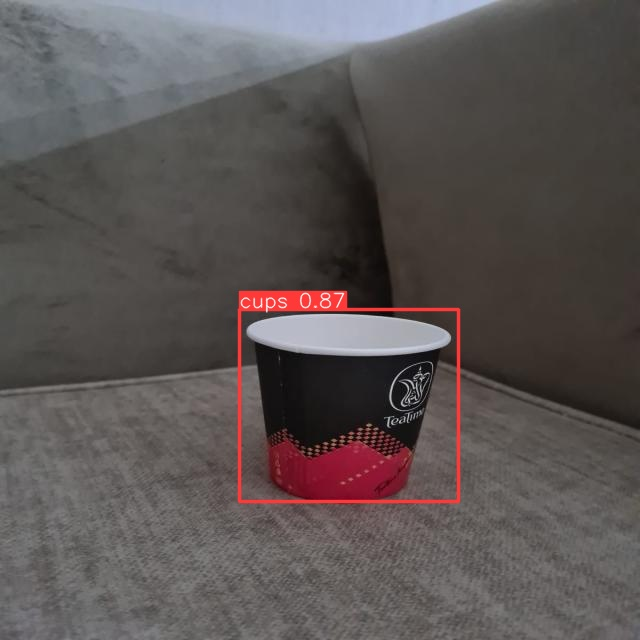

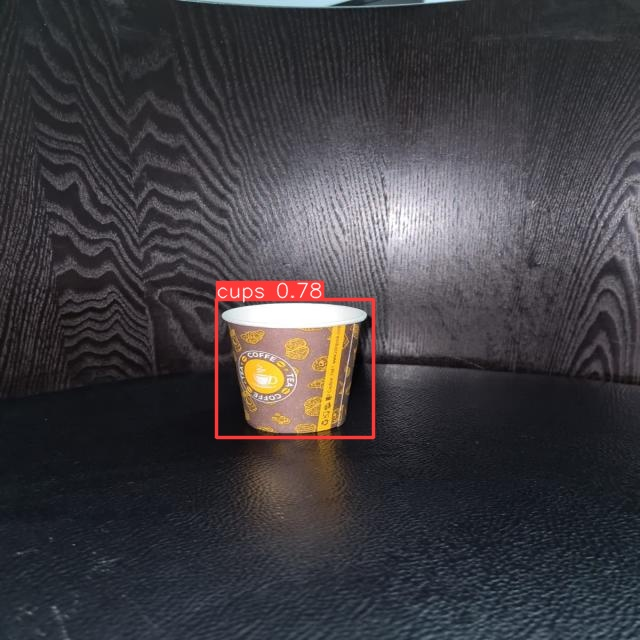

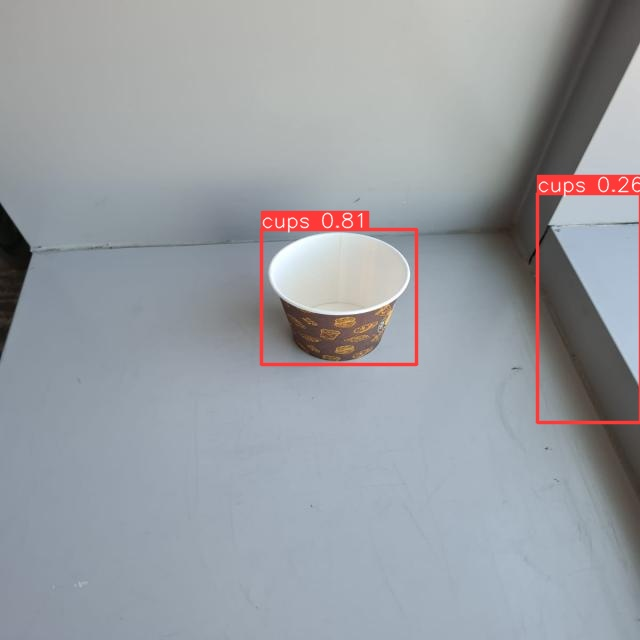

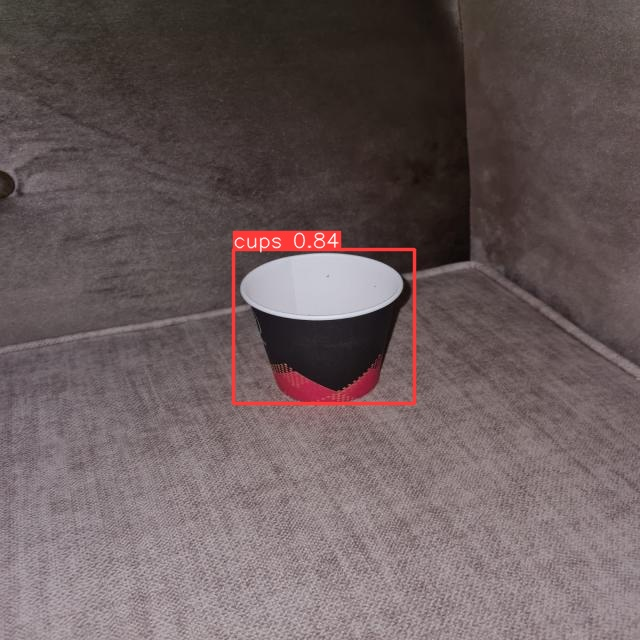

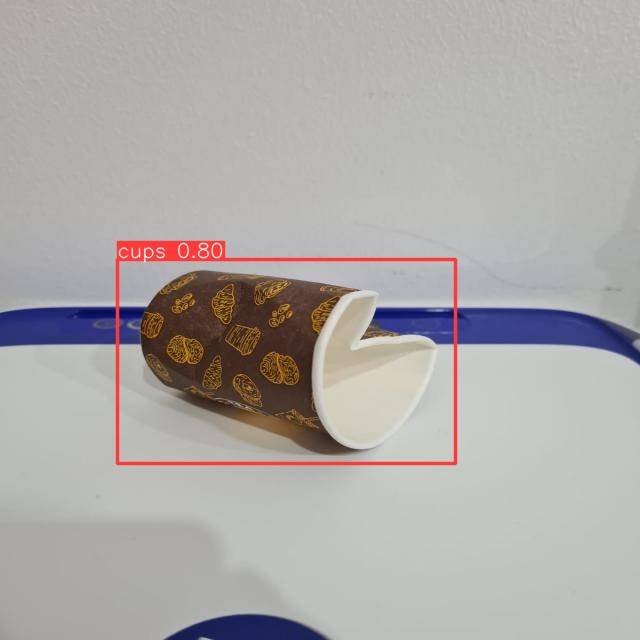

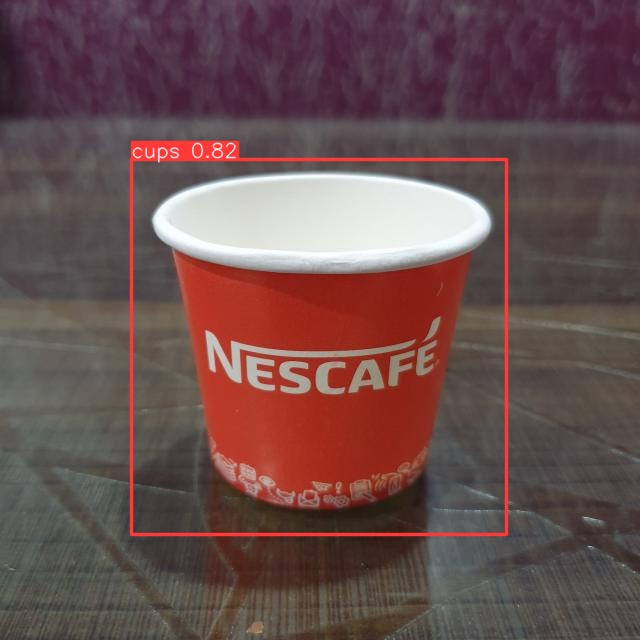

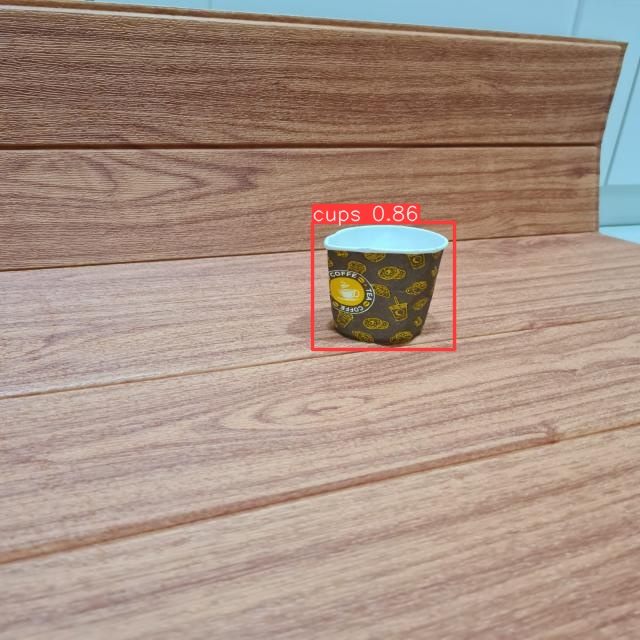

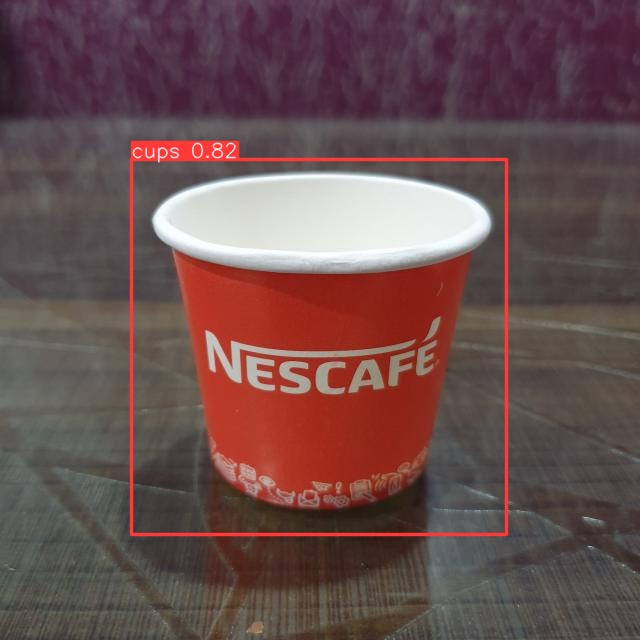

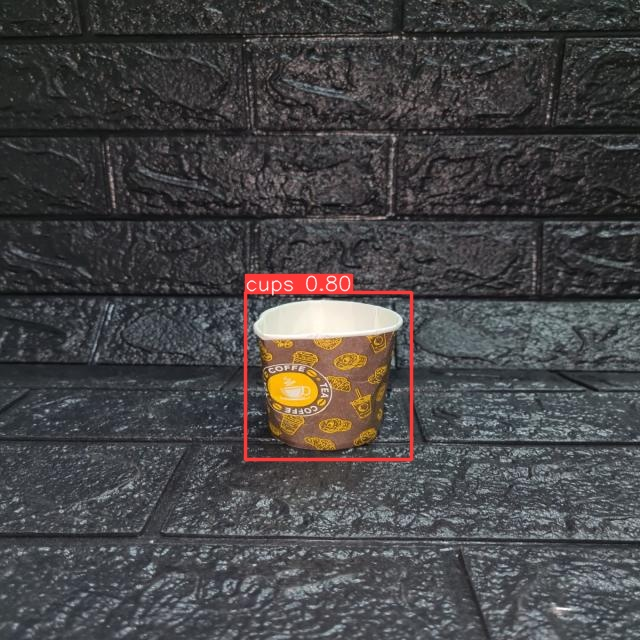

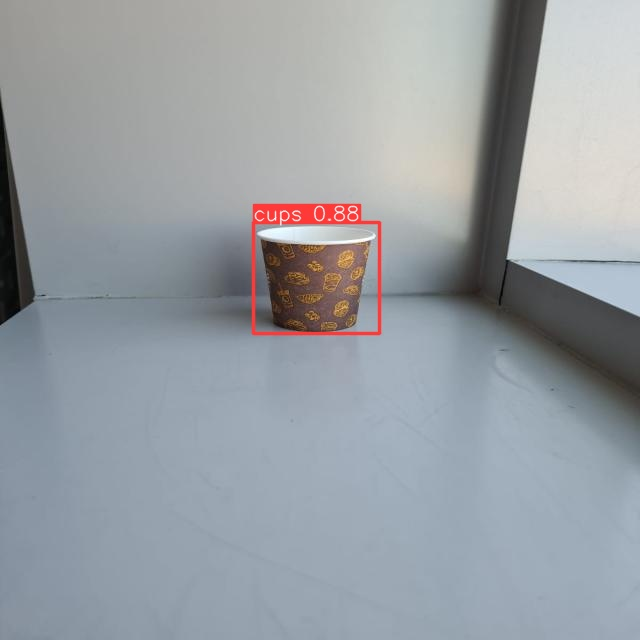

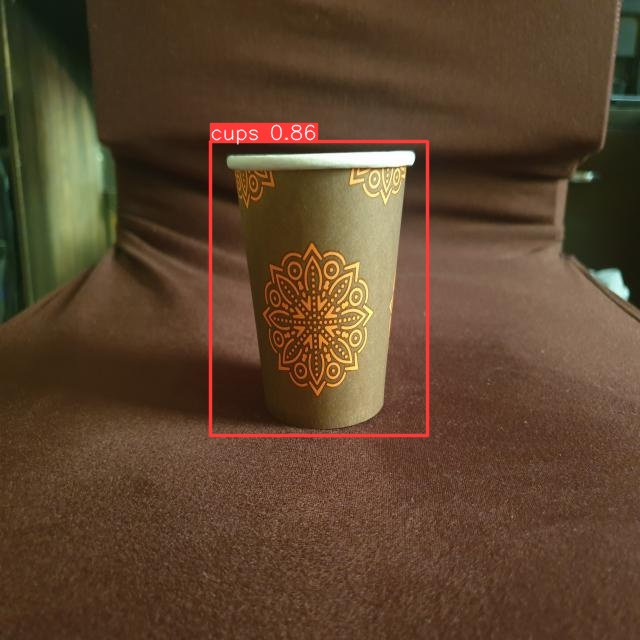

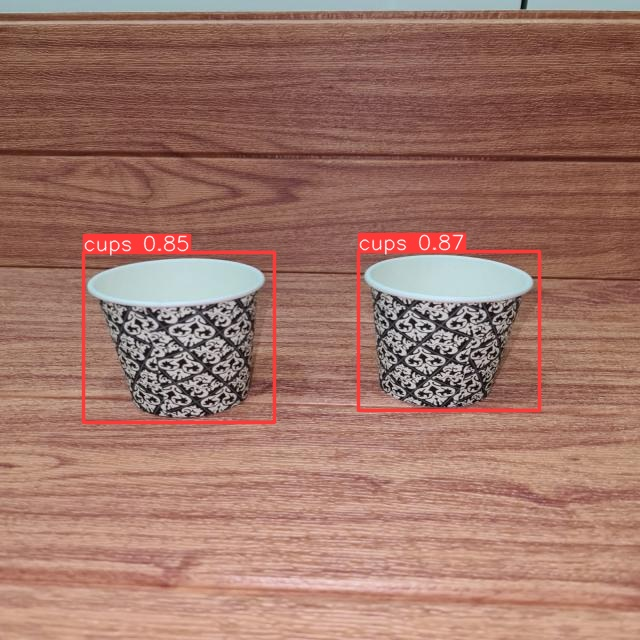

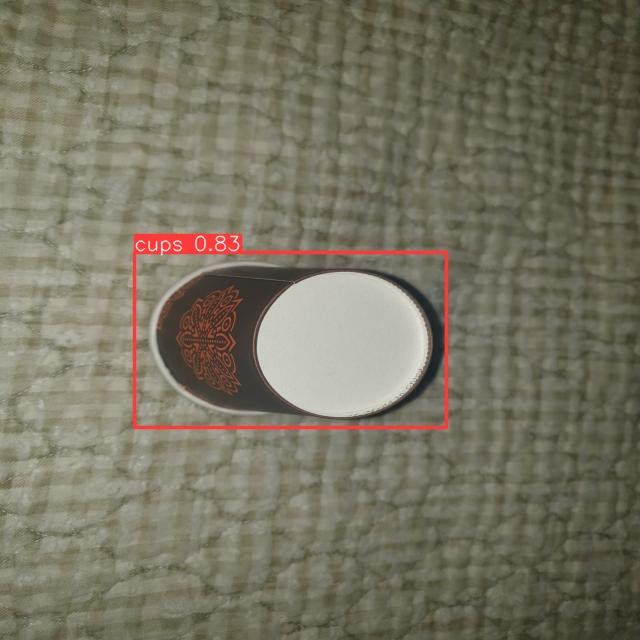

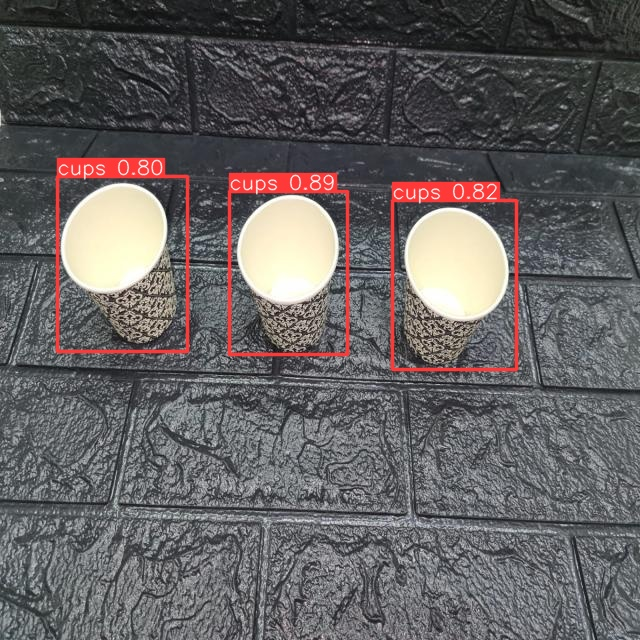

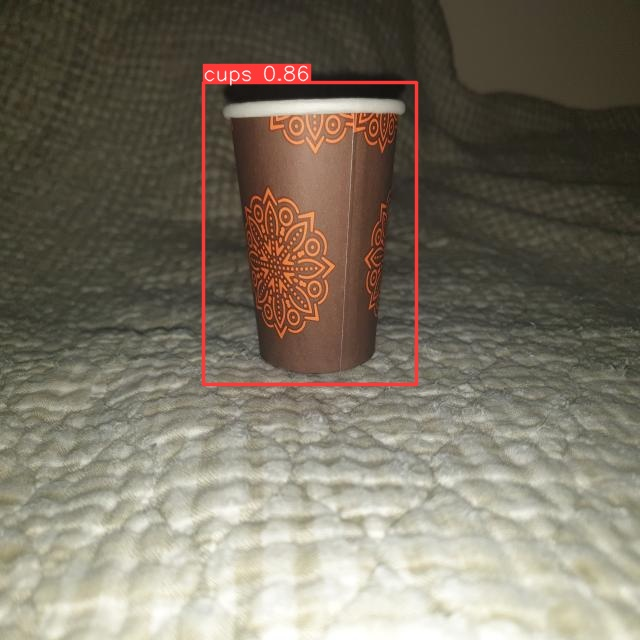

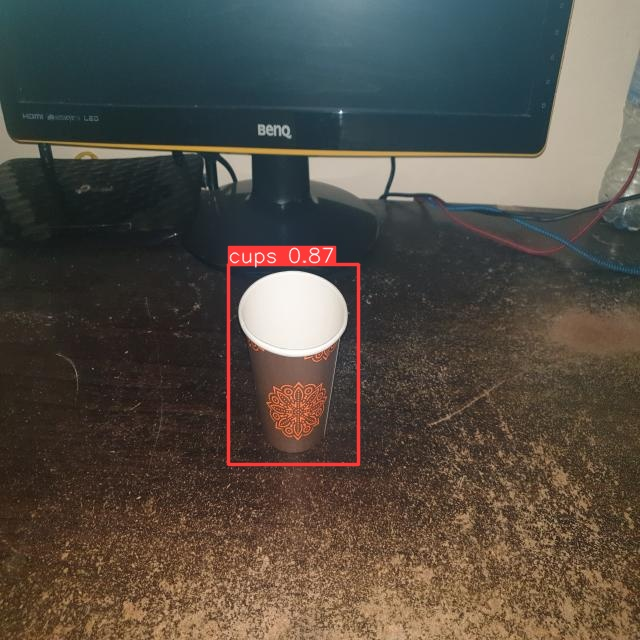

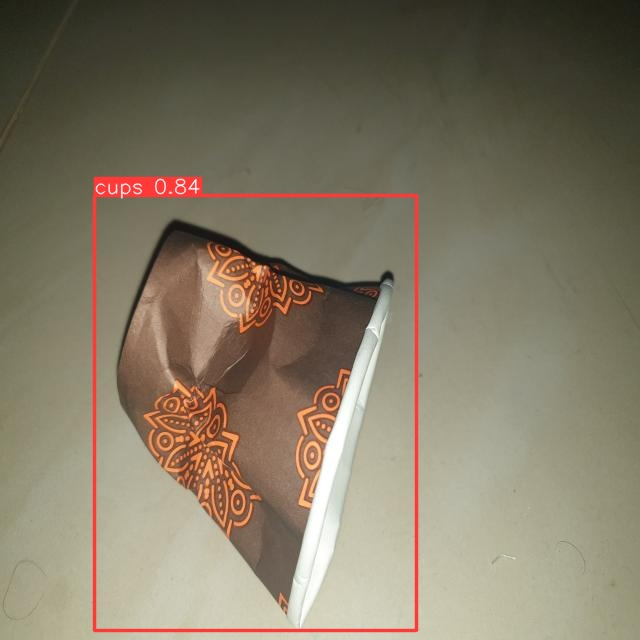

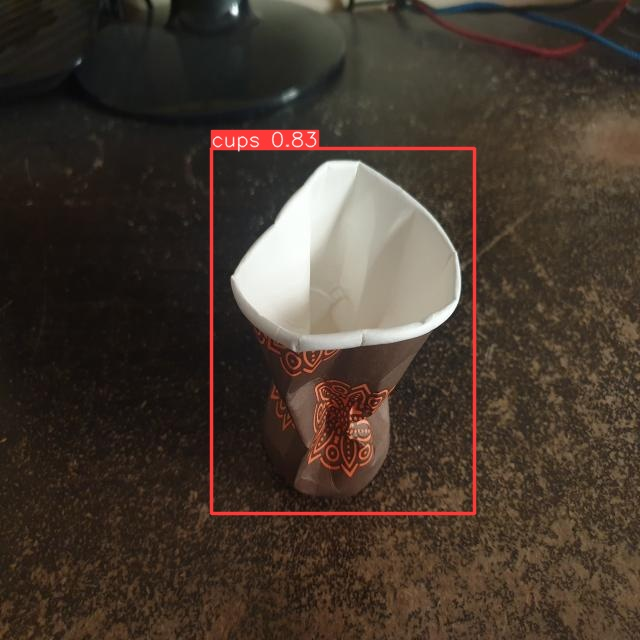

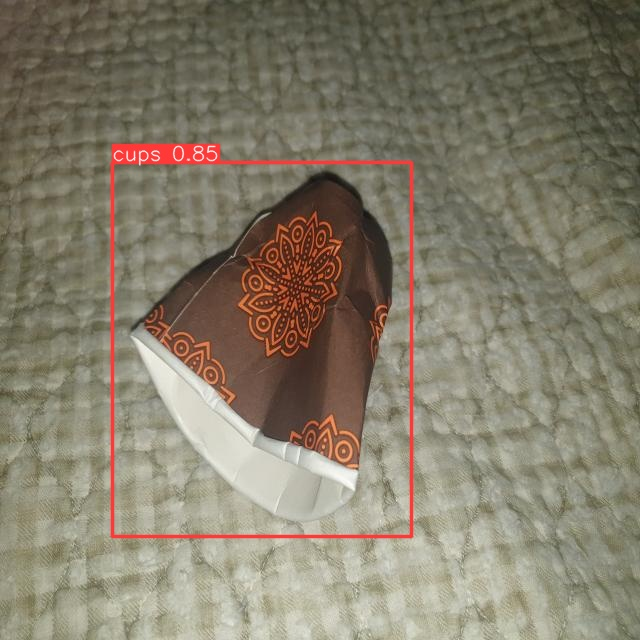

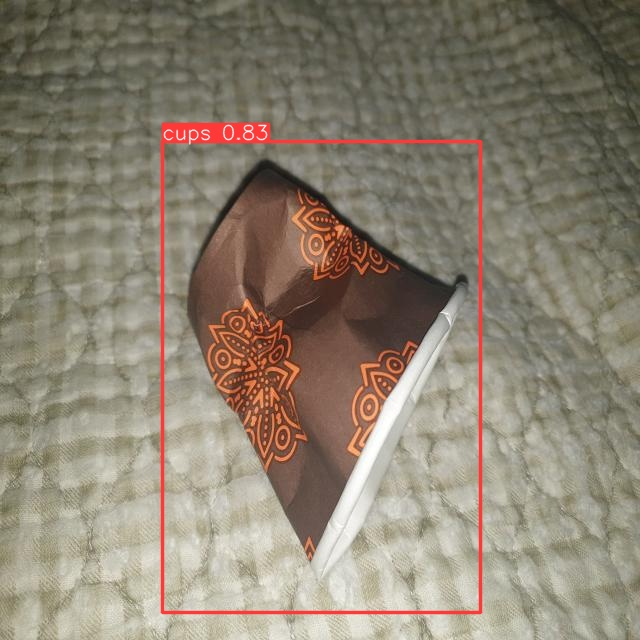

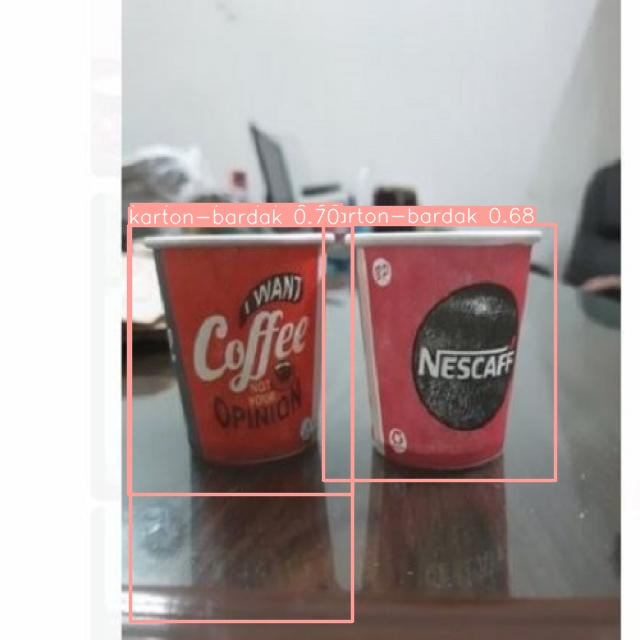

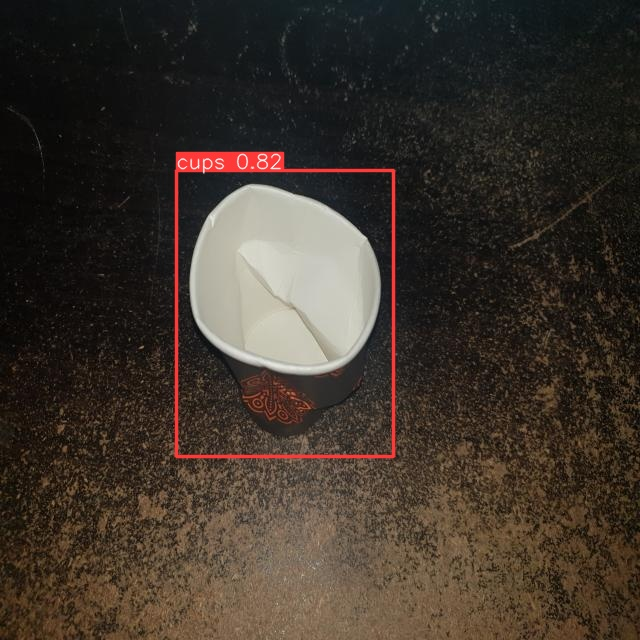

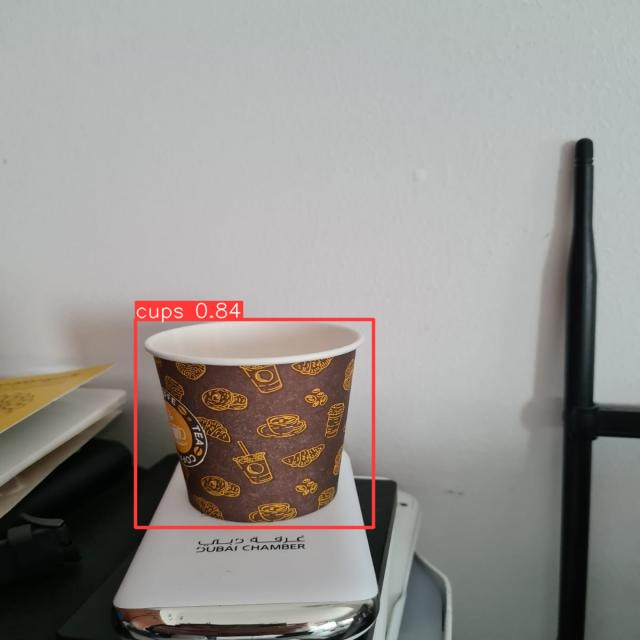

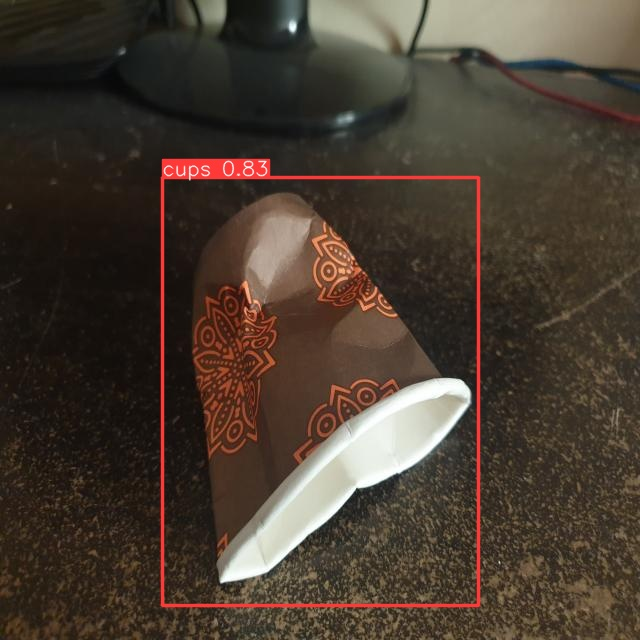

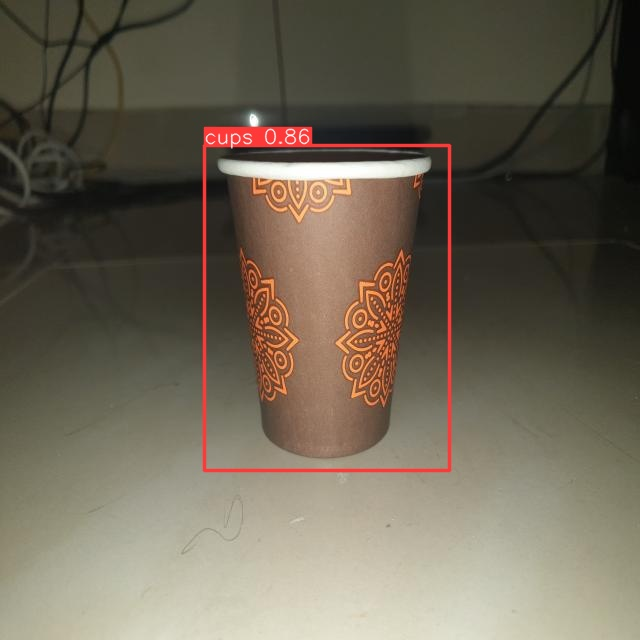

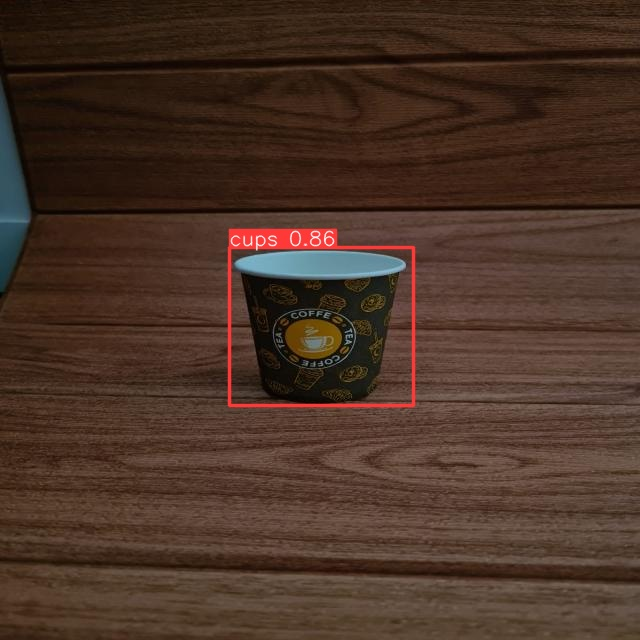

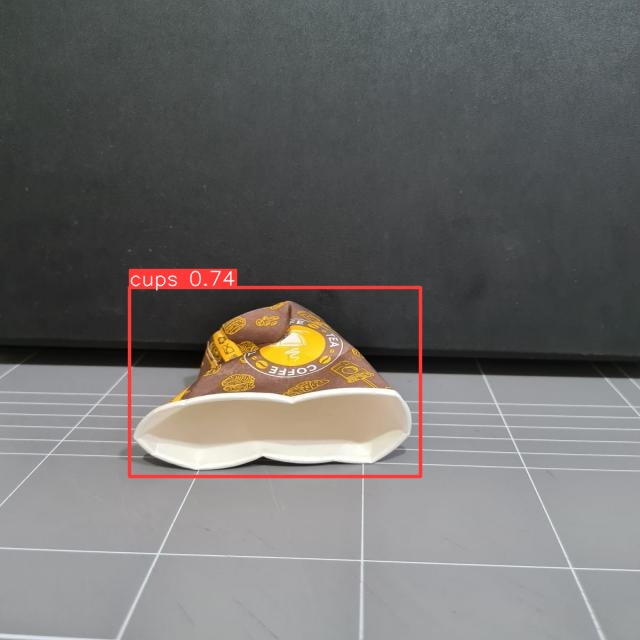

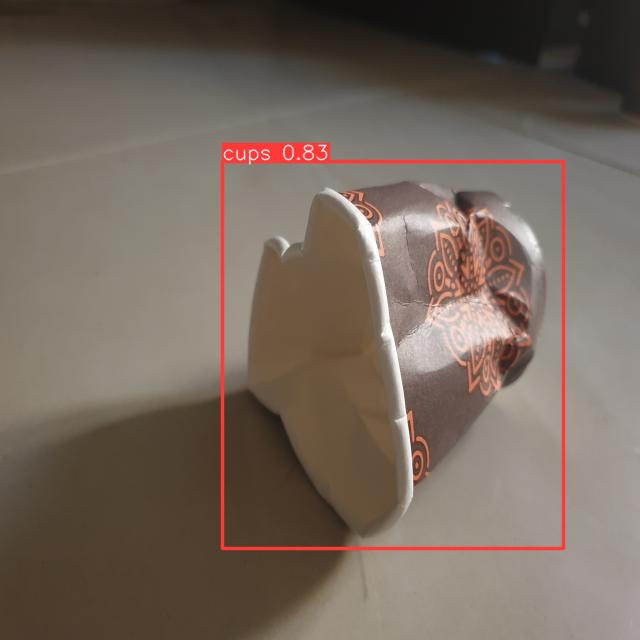

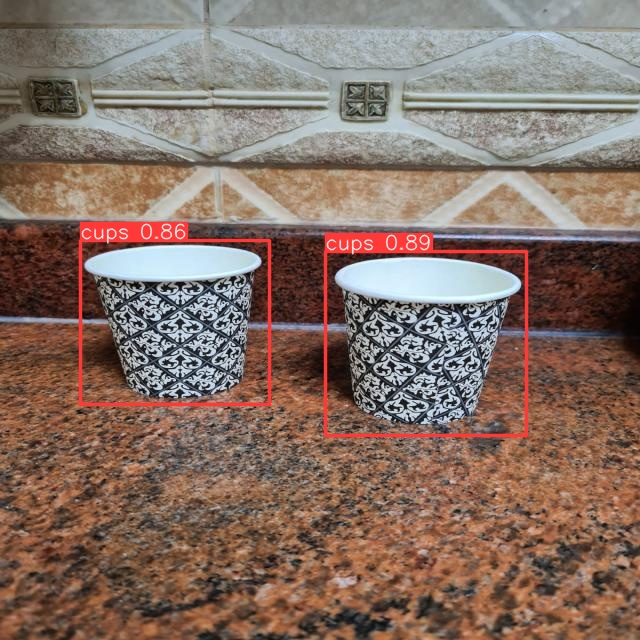

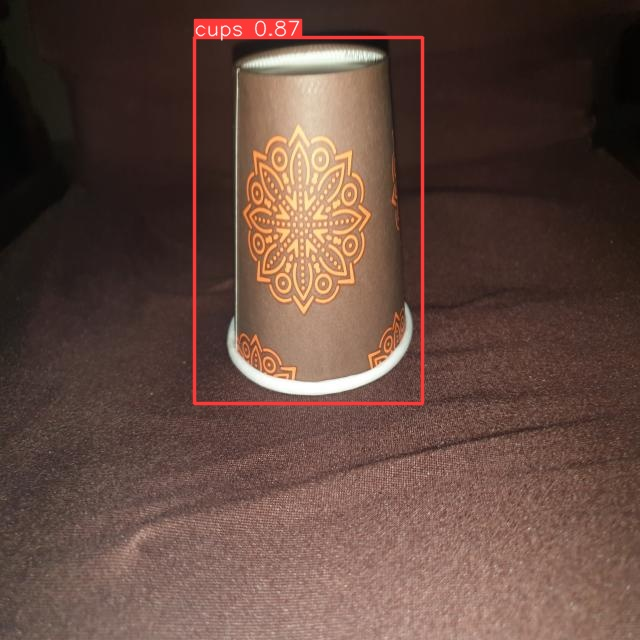

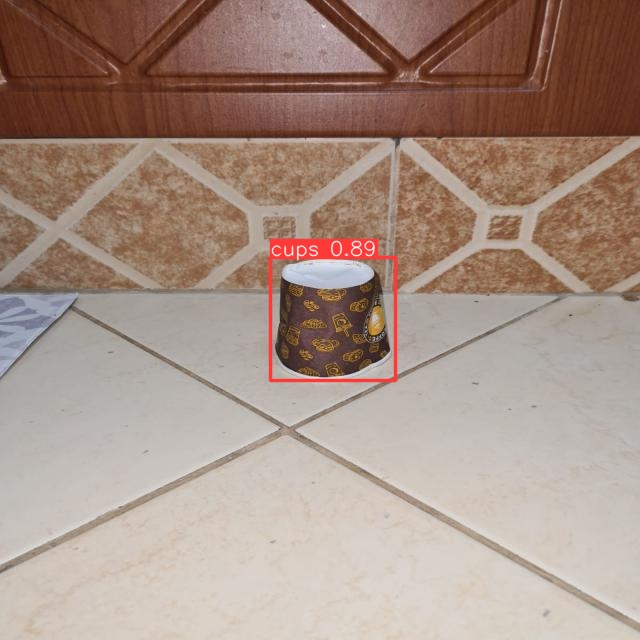

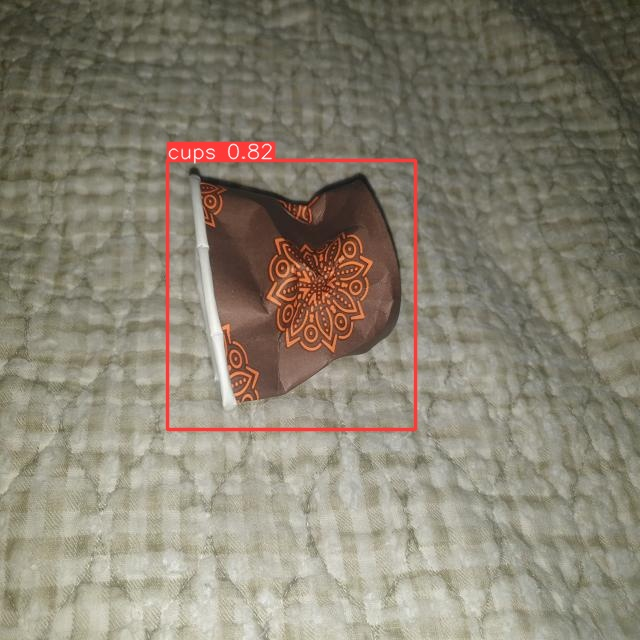

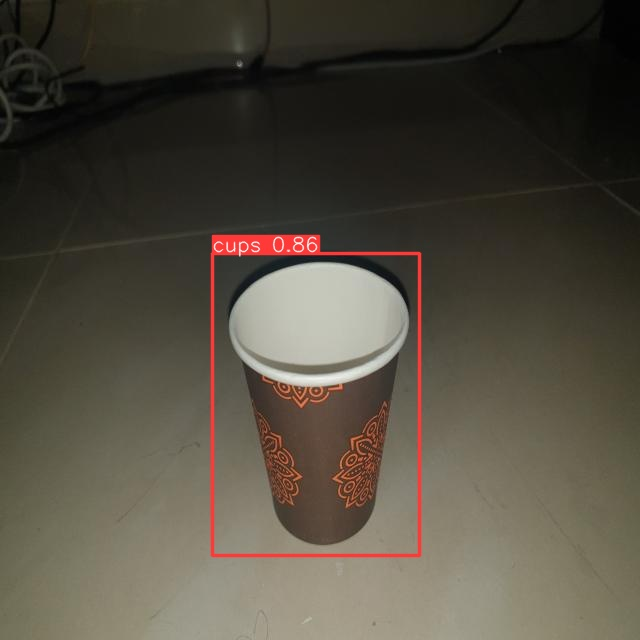

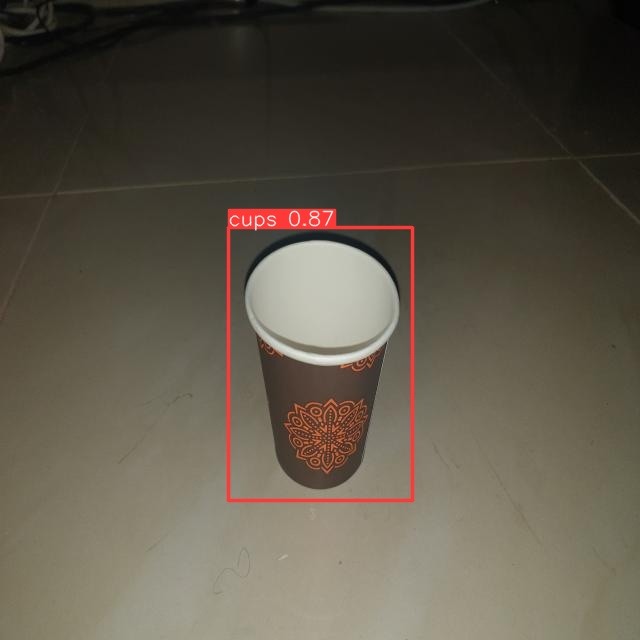

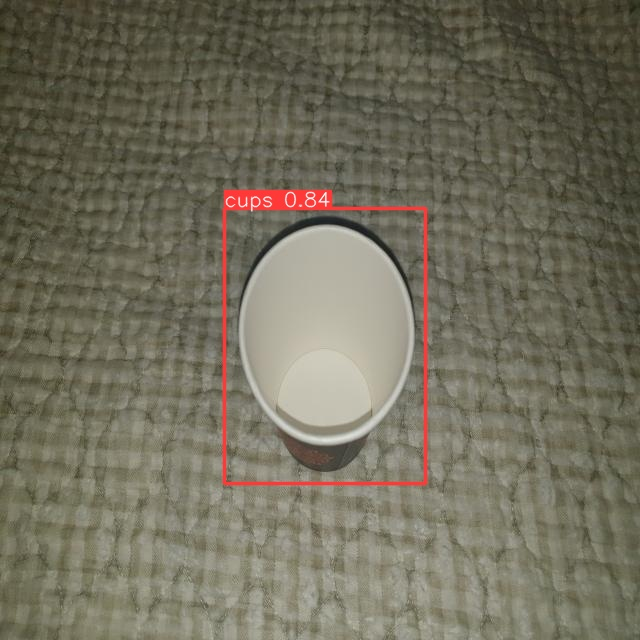

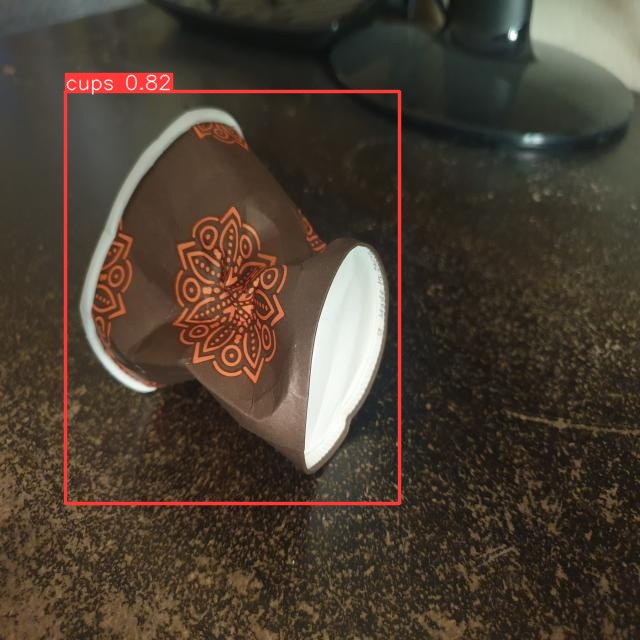

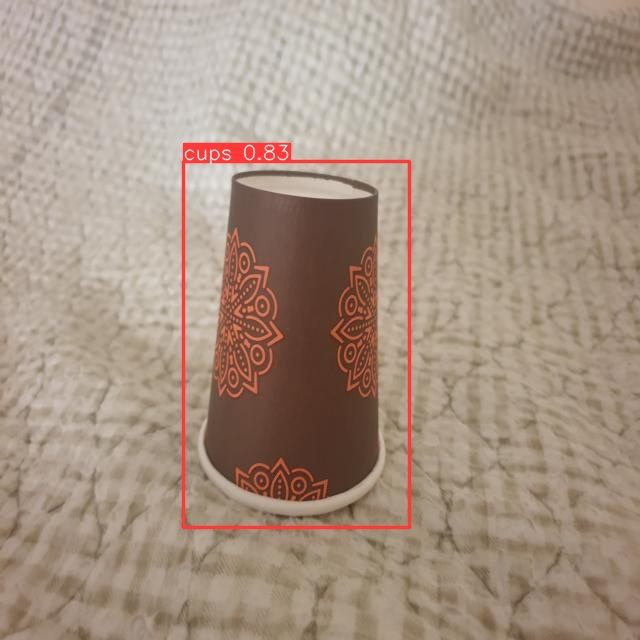

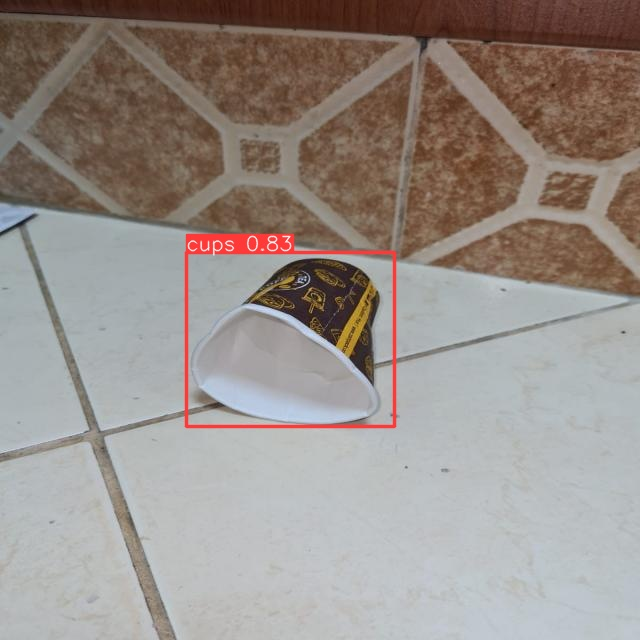

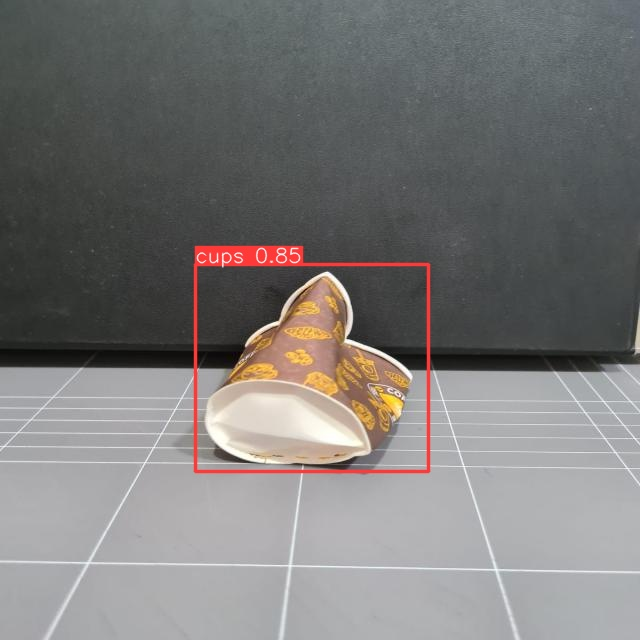

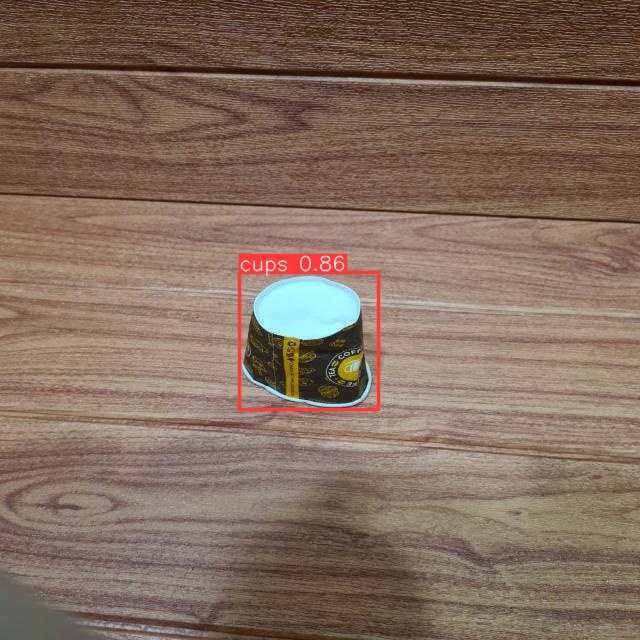

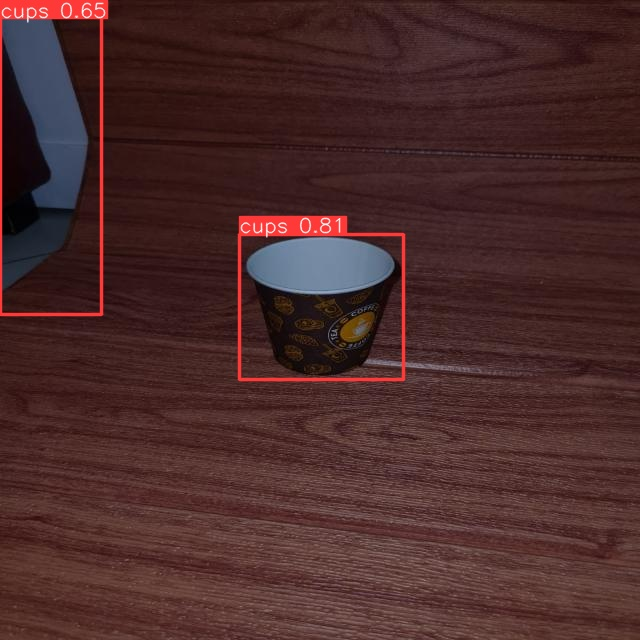

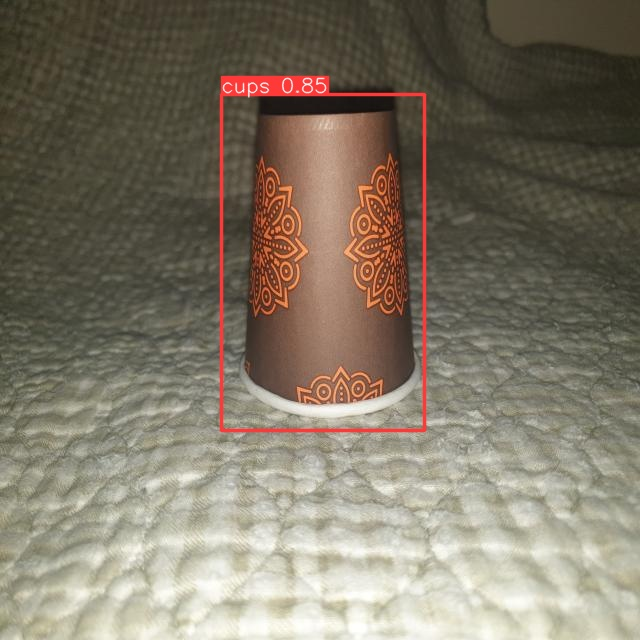

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{CURRENT_DIRECTORY}/runs/detect/predict/*.jpg')[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")